# IMPORT LIBRARIES & DATA


In [1]:

import sys
sys.path.append('../src')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve

import random


In [2]:
distance_df = pd.read_csv('../data/HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48


In [3]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)

# GA + Local search


=== Số người (m) = 1 ===


Chạy GA (m = 1):   0%|                          | 1/300 [00:01<06:23,  1.28s/it]

[Gen   0] Best fitness: 1605.57


Chạy GA (m = 1):   7%|█▊                       | 22/300 [00:04<00:38,  7.14it/s]

[Gen  20] Best fitness: 1288.22


Chạy GA (m = 1):  14%|███▍                     | 41/300 [00:06<00:34,  7.46it/s]

[Gen  40] Best fitness: 1136.89


Chạy GA (m = 1):  21%|█████▏                   | 62/300 [00:09<00:26,  9.11it/s]

[Gen  60] Best fitness: 1098.31


Chạy GA (m = 1):  27%|██████▊                  | 82/300 [00:11<00:26,  8.21it/s]

[Gen  80] Best fitness: 1081.28


Chạy GA (m = 1):  34%|████████                | 101/300 [00:13<00:20,  9.86it/s]

[Gen 100] Best fitness: 1081.28


Chạy GA (m = 1):  40%|█████████▋              | 121/300 [00:15<00:17, 10.13it/s]

[Gen 120] Best fitness: 1081.28


Chạy GA (m = 1):  47%|███████████▎            | 142/300 [00:18<00:15, 10.20it/s]

[Gen 140] Best fitness: 1069.64


Chạy GA (m = 1):  54%|████████████▉           | 162/300 [00:20<00:15,  8.65it/s]

[Gen 160] Best fitness: 1021.04


Chạy GA (m = 1):  60%|██████████████▍         | 181/300 [00:24<00:29,  4.10it/s]

[Gen 180] Best fitness: 1021.01


Chạy GA (m = 1):  67%|████████████████        | 201/300 [00:30<00:26,  3.71it/s]

[Gen 200] Best fitness: 1003.57


Chạy GA (m = 1):  74%|█████████████████▋      | 221/300 [00:36<00:19,  4.12it/s]

[Gen 220] Best fitness: 984.93


Chạy GA (m = 1):  80%|███████████████████▎    | 241/300 [00:40<00:09,  6.20it/s]

[Gen 240] Best fitness: 961.79


Chạy GA (m = 1):  87%|████████████████████▉   | 262/300 [00:43<00:04,  9.50it/s]

[Gen 260] Best fitness: 941.35


Chạy GA (m = 1):  94%|██████████████████████▌ | 282/300 [00:46<00:02,  7.54it/s]

[Gen 280] Best fitness: 912.70


Chạy GA (m = 1): 100%|████████████████████████| 300/300 [00:48<00:00,  6.20it/s]


[Gen 299] Best fitness: 889.19
Tổng quãng đường: 889.19
Tuyến dài nhất (fitness): 889.19
Chênh lệch giữa các tuyến (Balance metric): 0.00
Thời gian thực thi: 48.4083 giây
Số vòng lặp để hội tụ: 49
Tốc độ hội tụ: 14.6200 đơn vị/gen
 - Tuyến 1 (889.19): [0, 82, 84, 109, 117, 58, 85, 100, 94, 56, 51, 83, 63, 7, 114, 50, 67, 72, 116, 32, 3, 48, 8, 101, 28, 39, 26, 5, 42, 41, 49, 68, 13, 91, 77, 65, 46, 2, 6, 44, 4, 59, 60, 74, 1, 55, 22, 104, 31, 29, 108, 23, 102, 24, 110, 98, 18, 20, 81, 89, 99, 54, 9, 78, 66, 47, 52, 61, 14, 12, 97, 11, 53, 57, 75, 70, 17, 69, 62, 113, 120, 34, 16, 21, 25, 27, 80, 93, 43, 86, 88, 90, 92, 87, 96, 35, 121, 37, 107, 118, 30, 45, 10, 115, 103, 125, 36, 106, 33, 122, 79, 15, 76, 64, 71, 19, 73, 105, 112, 111, 123, 38, 119, 95, 126, 40, 124, 0]


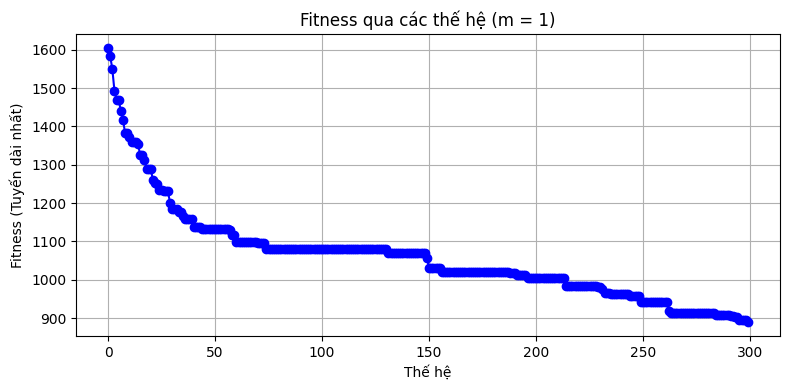


=== Số người (m) = 2 ===


Chạy GA (m = 2):   0%|                          | 1/300 [00:00<00:51,  5.78it/s]

[Gen   0] Best fitness: 853.65


Chạy GA (m = 2):   7%|█▊                       | 21/300 [00:03<00:54,  5.08it/s]

[Gen  20] Best fitness: 729.60


Chạy GA (m = 2):  14%|███▍                     | 41/300 [00:06<00:40,  6.40it/s]

[Gen  40] Best fitness: 691.38


Chạy GA (m = 2):  20%|█████                    | 61/300 [00:09<00:27,  8.56it/s]

[Gen  60] Best fitness: 683.91


Chạy GA (m = 2):  27%|██████▊                  | 81/300 [00:12<00:34,  6.30it/s]

[Gen  80] Best fitness: 663.01


Chạy GA (m = 2):  34%|████████                | 101/300 [00:15<00:32,  6.15it/s]

[Gen 100] Best fitness: 613.41


Chạy GA (m = 2):  41%|█████████▊              | 122/300 [00:17<00:18,  9.60it/s]

[Gen 120] Best fitness: 605.84


Chạy GA (m = 2):  47%|███████████▎            | 141/300 [00:20<00:23,  6.64it/s]

[Gen 140] Best fitness: 586.77


Chạy GA (m = 2):  54%|████████████▉           | 162/300 [00:23<00:15,  8.93it/s]

[Gen 160] Best fitness: 574.59


Chạy GA (m = 2):  60%|██████████████▍         | 181/300 [00:25<00:16,  7.17it/s]

[Gen 180] Best fitness: 574.59


Chạy GA (m = 2):  67%|████████████████▏       | 202/300 [00:28<00:12,  7.87it/s]

[Gen 200] Best fitness: 574.59


Chạy GA (m = 2):  74%|█████████████████▋      | 221/300 [00:30<00:08,  8.84it/s]

[Gen 220] Best fitness: 574.59


Chạy GA (m = 2):  81%|███████████████████▎    | 242/300 [00:33<00:05,  9.92it/s]

[Gen 240] Best fitness: 574.59


Chạy GA (m = 2):  87%|████████████████████▉   | 261/300 [00:35<00:03, 10.21it/s]

[Gen 260] Best fitness: 574.59


Chạy GA (m = 2):  94%|██████████████████████▌ | 282/300 [00:37<00:02,  6.23it/s]

[Gen 280] Best fitness: 574.59


Chạy GA (m = 2): 100%|████████████████████████| 300/300 [00:40<00:00,  7.45it/s]


[Gen 299] Best fitness: 574.59
Tổng quãng đường: 1146.71
Tuyến dài nhất (fitness): 574.59
Chênh lệch giữa các tuyến (Balance metric): 2.47
Thời gian thực thi: 40.2998 giây
Số vòng lặp để hội tụ: 7
Tốc độ hội tụ: 39.8657 đơn vị/gen
 - Tuyến 1 (572.12): [0, 126, 40, 53, 49, 67, 1, 66, 13, 89, 65, 44, 47, 57, 45, 50, 59, 41, 64, 6, 87, 60, 82, 4, 2, 68, 3, 25, 85, 110, 73, 16, 120, 102, 34, 113, 12, 90, 30, 20, 108, 71, 43, 48, 109, 46, 11, 51, 83, 115, 117, 75, 55, 35, 27, 103, 70, 72, 10, 79, 31, 58, 74, 5, 0]
 - Tuyến 2 (574.59): [0, 9, 104, 99, 121, 107, 33, 106, 100, 94, 24, 86, 52, 54, 17, 18, 111, 92, 112, 56, 63, 97, 93, 116, 15, 96, 76, 21, 14, 80, 61, 42, 32, 29, 23, 19, 105, 122, 98, 101, 22, 78, 88, 114, 81, 36, 118, 91, 77, 69, 62, 7, 26, 28, 8, 39, 125, 37, 119, 124, 123, 38, 95, 84, 0]


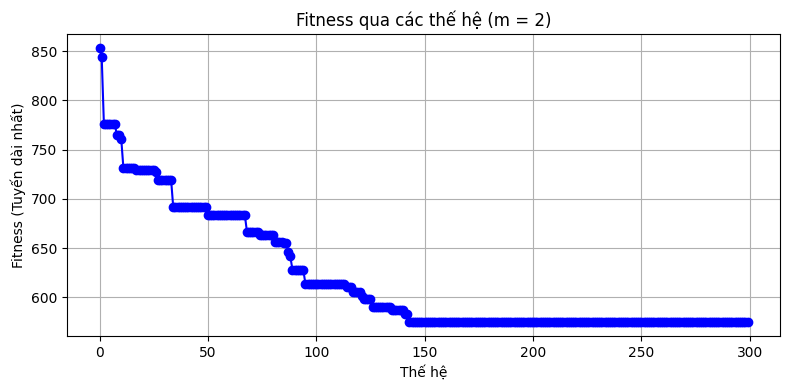


=== Số người (m) = 3 ===


Chạy GA (m = 3):   0%|                                  | 0/300 [00:00<?, ?it/s]

[Gen   0] Best fitness: 613.09


Chạy GA (m = 3):   7%|█▊                       | 22/300 [00:03<00:34,  8.01it/s]

[Gen  20] Best fitness: 500.46


Chạy GA (m = 3):  14%|███▌                     | 42/300 [00:05<00:30,  8.37it/s]

[Gen  40] Best fitness: 482.13


Chạy GA (m = 3):  20%|█████                    | 61/300 [00:09<00:36,  6.52it/s]

[Gen  60] Best fitness: 482.13


Chạy GA (m = 3):  27%|██████▊                  | 81/300 [00:11<00:30,  7.25it/s]

[Gen  80] Best fitness: 465.65


Chạy GA (m = 3):  34%|████████                | 101/300 [00:15<00:36,  5.42it/s]

[Gen 100] Best fitness: 465.65


Chạy GA (m = 3):  41%|█████████▊              | 122/300 [00:18<00:22,  8.06it/s]

[Gen 120] Best fitness: 448.59


Chạy GA (m = 3):  47%|███████████▎            | 141/300 [00:21<00:28,  5.56it/s]

[Gen 140] Best fitness: 448.59


Chạy GA (m = 3):  54%|████████████▉           | 161/300 [00:24<00:18,  7.37it/s]

[Gen 160] Best fitness: 448.59


Chạy GA (m = 3):  61%|██████████████▌         | 182/300 [00:26<00:11, 10.18it/s]

[Gen 180] Best fitness: 448.59


Chạy GA (m = 3):  67%|████████████████▏       | 202/300 [00:29<00:13,  7.36it/s]

[Gen 200] Best fitness: 448.59


Chạy GA (m = 3):  74%|█████████████████▊      | 222/300 [00:32<00:12,  6.46it/s]

[Gen 220] Best fitness: 448.59


Chạy GA (m = 3):  81%|███████████████████▎    | 242/300 [00:35<00:06,  9.21it/s]

[Gen 240] Best fitness: 436.72


Chạy GA (m = 3):  87%|████████████████████▉   | 262/300 [00:38<00:05,  6.84it/s]

[Gen 260] Best fitness: 422.11


Chạy GA (m = 3):  94%|██████████████████████▍ | 281/300 [00:42<00:04,  4.00it/s]

[Gen 280] Best fitness: 422.11


Chạy GA (m = 3): 100%|████████████████████████| 300/300 [00:45<00:00,  6.58it/s]

[Gen 299] Best fitness: 410.60
Tổng quãng đường: 1224.44
Tuyến dài nhất (fitness): 410.60
Chênh lệch giữa các tuyến (Balance metric): 7.15
Thời gian thực thi: 45.6308 giây
Số vòng lặp để hội tụ: 8
Tốc độ hội tụ: 25.3112 đơn vị/gen
 - Tuyến 1 (410.60): [0, 126, 119, 38, 123, 109, 60, 55, 2, 107, 41, 44, 71, 18, 93, 74, 30, 32, 46, 57, 75, 67, 45, 52, 53, 106, 25, 48, 58, 42, 83, 37, 31, 20, 113, 63, 70, 10, 54, 100, 103, 36, 22, 0]
 - Tuyến 2 (410.39): [0, 99, 101, 24, 90, 89, 72, 111, 112, 110, 66, 85, 1, 78, 49, 98, 79, 92, 13, 87, 73, 19, 62, 102, 56, 26, 51, 5, 115, 117, 120, 81, 88, 64, 97, 12, 47, 6, 8, 80, 9, 68, 43, 0]
 - Tuyến 3 (403.45): [0, 59, 11, 77, 4, 50, 3, 65, 15, 76, 91, 94, 105, 28, 86, 7, 108, 35, 17, 16, 21, 34, 69, 61, 121, 104, 14, 114, 39, 27, 23, 96, 33, 29, 125, 118, 116, 122, 82, 84, 95, 124, 40, 0]


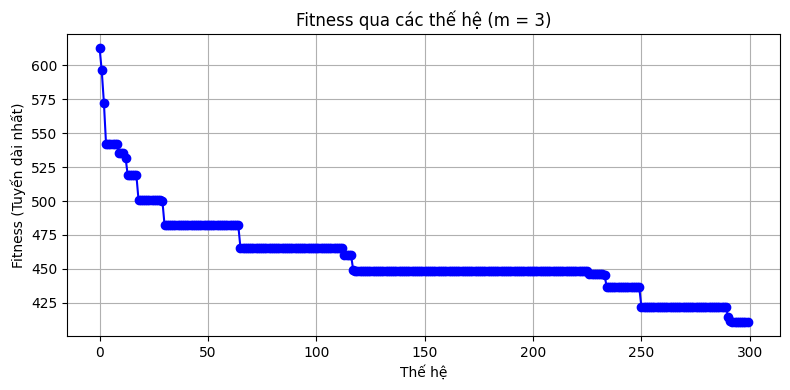

In [4]:

for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")
    
    start_time = time.time()
    total_distance, routes, fitness, fitness_per_generation = solve(distance_matrix, m)
    end_time = time.time()

    exec_time = end_time - start_time

    # Tính độ dài từng tuyến để đánh giá
    route_distances = [
        sum(distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
        for r in routes
    ]
    max_len = max(route_distances)
    min_len = min(route_distances)
    balance_metric = max_len - min_len

    # Phân tích hội tụ
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen else 0

    # In kết quả
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất (fitness): {fitness:.2f}")
    print(f"Chênh lệch giữa các tuyến (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    for i, r in enumerate(routes):
        print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {r}")

    # Vẽ biểu đồ fitness
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='blue')
    plt.title(f"Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Fitness (Tuyến dài nhất)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# GASA


# RLGA

# NSGA II